In [2]:
import numpy as np
import csv
import matplotlib.pyplot as plt

In [3]:
#speed of light 
c0 = 299792458 #(m/s)
n_2= 2.e-19 #(m^2/W)
om_1550 = 2*np.pi*c0/(1550.e-9) #angular frequency for 1550nm light
A_1550 = 1.73107e-12#mode area from Lumerical of the fundamental 1550nm TE mode (m^2)
om_1064 = 2*np.pi*c0/(1064.e-9) #angular frequency for 1064nm light
A_1064 = 0.582584e-12 #mode area from Lumerical of the fundamental 1064nm TE mode (m^2)

gam_1550=n_2*om_1550/(c0*A_1550) #nonlinear coefficient for 1550nm mode in 1/(m W)
gam_1064=n_2*om_1064/(c0*A_1064) #nonlinear coefficient for 1064nm mode in 1/(m W)
print(gam_1550)
print(gam_1064)

0.46834246334531376
2.027261081269995


[-100.  -99.  -98.  -97.  -96.  -95.  -94.  -93.  -92.  -91.  -90.  -89.
  -88.  -87.  -86.  -85.  -84.  -83.  -82.  -81.  -80.  -79.  -78.  -77.
  -76.  -75.  -74.  -73.  -72.  -71.  -70.  -69.  -68.  -67.  -66.  -65.
  -64.  -63.  -62.  -61.  -60.  -59.  -58.  -57.  -56.  -55.  -54.  -53.
  -52.  -51.  -50.  -49.  -48.  -47.  -46.  -45.  -44.  -43.  -42.  -41.
  -40.  -39.  -38.  -37.  -36.  -35.  -34.  -33.  -32.  -31.  -30.  -29.
  -28.  -27.  -26.  -25.  -24.  -23.  -22.  -21.  -20.  -19.  -18.  -17.
  -16.  -15.  -14.  -13.  -12.  -11.  -10.   -9.   -8.   -7.   -6.   -5.
   -4.   -3.   -2.   -1.    0.    1.    2.    3.    4.    5.    6.    7.
    8.    9.   10.   11.   12.   13.   14.   15.   16.   17.   18.   19.
   20.   21.   22.   23.   24.   25.   26.   27.   28.   29.   30.   31.
   32.   33.   34.   35.   36.   37.   38.   39.   40.   41.   42.   43.
   44.   45.   46.   47.   48.   49.   50.   51.   52.   53.   54.   55.
   56.   57.   58.   59.   60.   61.   62.   63.   

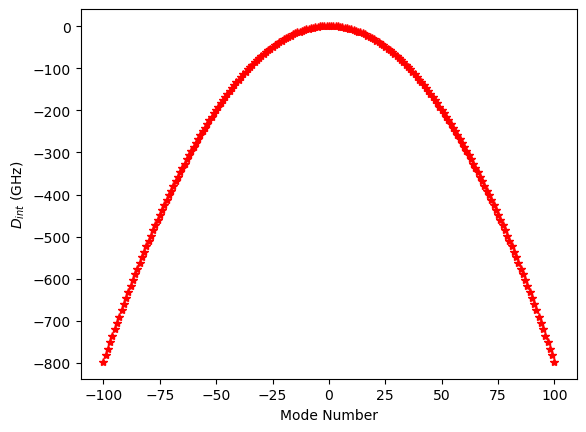

In [24]:
mu_b=-100
mu_t=100
mus=np.linspace(mu_b,mu_t,mu_t-mu_b+1)
print(mus)
#bragg splitting in Hz
BG=1.5*1e9
D_0=0
#FSR was about 1THz
D_1=240.5e9
#guessing D_2 here
D_2=159.68e6
v_pump=193.4144890323e12 #1550nm in THz
#constructing integrated dispersion
Dint=np.zeros(len(mus))
for i in range(len(mus)):
    if mus[i] ==0:#,-3,3]:
        Dint[i]=-0.25e9
    elif mus[i] in [-3,3]:
        Dint[i]=0.0
    else:
        Dint[i]=-D_2/2*mus[i]**2+BG/2+D_0
plt.plot(mus,Dint/1e9, "r*")
#plt.ylim([-5,5])
#plt.xlim([-20,20])
plt.xlabel("Mode Number")
plt.ylabel(r"$D_{int}$ (GHz)")
with open("Tantala_test_PhCr_Disp_1500MHz.csv","w") as csvfile:
    csvwriter=csv.writer(csvfile)
    for i in range(len(mus)):
        row=[mus[i],Dint[i]+D_1*mus[i]+v_pump]
        csvwriter.writerow(row)

    

In [9]:
print((371084056760649.44-370102256585805.6)/1e9)
print((100+549)/2)

981.8001748438126
324.5
